<a href="https://colab.research.google.com/github/Nitroblaster99/hours-of-sleep/blob/main/Sleep_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download dataset through Kaggle website

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download krupa1999/sleep-pattern

In [ ]:
! unzip sleep-pattern.zip

Archive:  sleep-pattern.zip
  inflating: Sleep_Analysis.csv      


Rename dataset into df

In [ ]:
data = 'Sleep_Analysis.csv'
df = pd.read_csv(data)

1) Understanding our data

In [ ]:
df.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2hrs,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,3-4 hrs,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,3-4 hrs,no,south,no,no,Tea,8.0000
3,23,Female,two,no,1-2 hrs,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,more than 5,yes,east,sometimes,yes,Tea and Coffee both,6.0000


In [ ]:
df.shape

(46, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               46 non-null     int64  
 1   Gender            46 non-null     object 
 2   meals/day         46 non-null     object 
 3   physical illness  46 non-null     object 
 4   screen time       46 non-null     object 
 5   bluelight filter  46 non-null     object 
 6   sleep direction   46 non-null     object 
 7   exercise          46 non-null     object 
 8   smoke/drink       46 non-null     object 
 9   beverage          46 non-null     object 
 10  sleep time        46 non-null     float64
dtypes: float64(1), int64(1), object(9)
memory usage: 4.1+ KB


As we can see, our dataset is quite small.
It might be difficult to get good results.

In [ ]:
# Numerical description
df.describe()

,Age,sleep time
count,46.000000,46.000000
mean,24.760870,6.757500
std,7.021189,1.348921
min,20.000000,1.500000
25%,22.000000,6.125000
50%,23.000000,7.000000
75%,24.000000,8.000000
max,59.000000,9.000000


Renaming columns, to a better readable format

In [ ]:
df.rename(columns={"Age": "age", "Gender":"gender", "physical illness": "physical_illness", "screen time": "screen_time", "bluelight filter": "bluelight_filter",
                   "sleep direction": "sleep_direction", "sleep time": "sleep_time"}, inplace=True)

In [ ]:
df.columns

Index(['age', 'gender', 'meals/day', 'physical_illness', 'screen_time',
       'bluelight_filter', 'sleep_direction', 'exercise', 'smoke/drink',
       'beverage', 'sleep_time'],
      dtype='object')

Replacing categorical screen_time values to numerical

In [ ]:
df["screen_time"].value_counts()

more than 5    16
2-3 hrs         8
3-4 hrs         7
1-2 hrs         6
4-5 hrs         6
0-1 hrs         2
2hrs            1
Name: screen_time, dtype: int64

In [ ]:
def replace_name(a, b):
  df.screen_time.replace(a, b, inplace=True)

'more than 5 hours' will replaced with 7 hours (the screen_time of an average user, from information retrived from the internet)

In [ ]:
replace_name('2-3 hrs', 3)
replace_name('3-4 hrs', 4)
replace_name('1-2 hrs', 2)
replace_name('4-5 hrs', 5)
replace_name('0-1 hrs', 1)
replace_name('2hrs', 2)
replace_name('more than 5', 7)

In [ ]:
df["screen_time"].value_counts()

7    16
3     8
2     7
4     7
5     6
1     2
Name: screen_time, dtype: int64

Identifying other values that need replacing or correction

In [ ]:
df["beverage"].value_counts()

Tea                    22
none of the above      10
Tea and Coffee both     8
Coffee                  6
Name: beverage, dtype: int64

In [ ]:
df.beverage.replace('none of the above', 'Other', inplace=True)
df.beverage.replace('Tea and Coffee both', 'Tea and Coffee', inplace=True)

In [ ]:
df["beverage"].value_counts()

Tea               22
Other             10
Tea and Coffee     8
Coffee             6
Name: beverage, dtype: int64

In [ ]:
df.gender.value_counts()

Male                 26
Female               18
Prefer not to say     2
Name: gender, dtype: int64

In [ ]:
# Remove unwanted values
gender_filter = df[(df['gender'] == 'Prefer not to say')].index

In [ ]:
df.drop(gender_filter, inplace=True)
df.gender.value_counts()

Male      26
Female    18
Name: gender, dtype: int64

In [ ]:
# Reset index
df.reset_index(drop=True, inplace=True)
df

,age,gender,meals/day,physical_illness,screen_time,bluelight_filter,sleep_direction,exercise,smoke/drink,beverage,sleep_time
0,22,Male,two,no,2,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,4,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,4,no,south,no,no,Tea,8.0000
3,23,Female,two,no,2,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,7,yes,east,sometimes,yes,Tea and Coffee,6.0000
5,22,Male,two,no,3,yes,west,sometimes,no,Tea,6.7575
6,22,Male,four,no,2,yes,south,yes,no,Other,7.0000
7,24,Female,three,yes,5,no,east,sometimes,no,Tea,6.5000
8,24,Male,four,no,3,yes,east,yes,no,Other,8.0000
9,23,Female,three,no,7,yes,north,yes,yes,Tea and Coffee,7.0000


In [ ]:
# Checking for NaN values
df.isna().sum()

age                 0
gender              0
meals/day           0
physical_illness    0
screen_time         0
bluelight_filter    0
sleep_direction     0
exercise            0
smoke/drink         0
beverage            0
sleep_time          0
dtype: int64

In [ ]:
# Computing pairwise correlation of columns
df.corr()

<ipython-input-27-435ef88647f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,screen_time,sleep_time
age,1.000000,-0.357575,-0.020131
screen_time,-0.357575,1.000000,-0.030322
sleep_time,-0.020131,-0.030322,1.000000


An important step to understanding our data better, is to visualise it

2.a) Visualizing Categorical Data

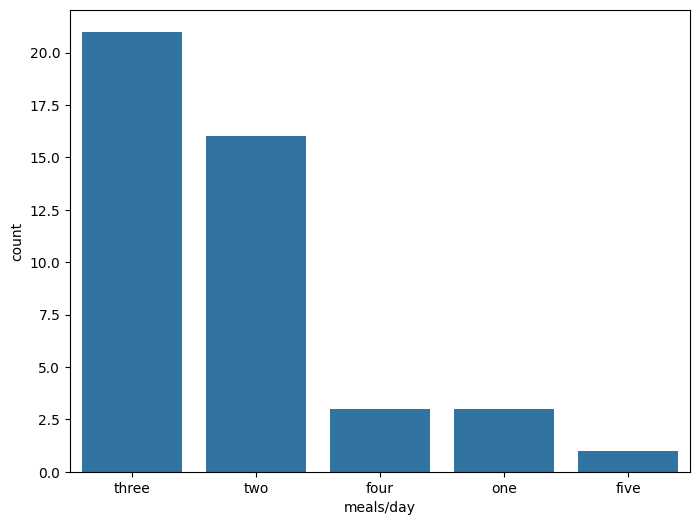

In [ ]:
plt.figure(figsize=(8,6))

order = df['meals/day'].value_counts(ascending=False).index
sns.countplot(x='meals/day', data=df, order=order)

plt.show()

The most common meals/day are three and then two

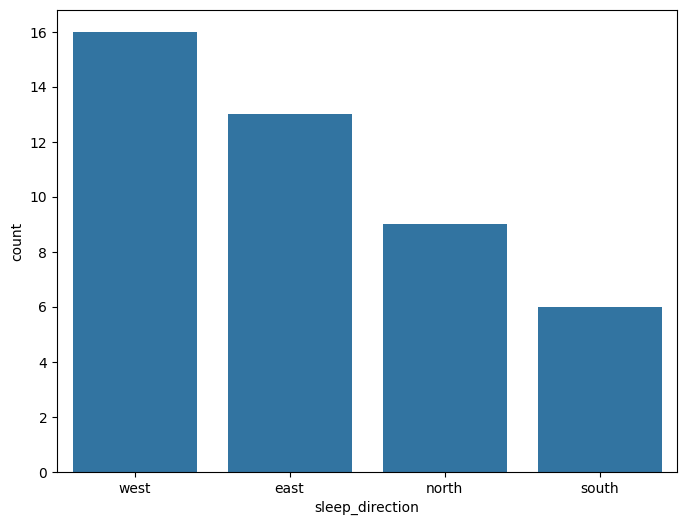

In [ ]:
plt.figure(figsize=(8,6))

order = df['sleep_direction'].value_counts(ascending=False).index
sns.countplot(x='sleep_direction', data=df, order=order)

plt.show()

The most common sleep_direction is west. Also, all the values are distributed with almsot an identical delcine.

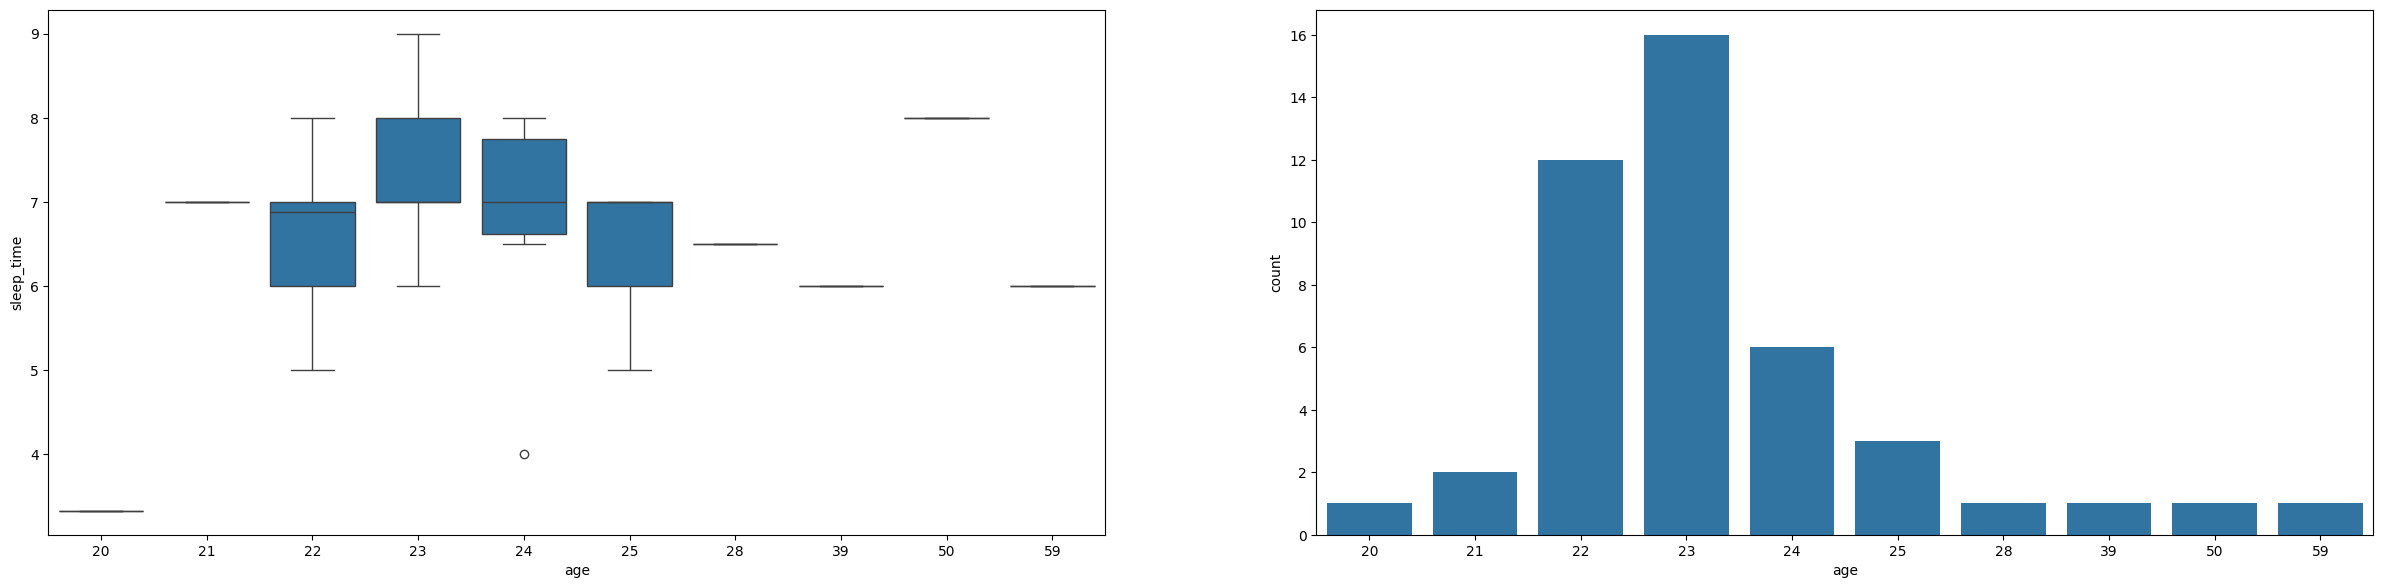

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
sns.boxplot(x='age', y='sleep_time', data=df)

plt.subplot(2,2,2)
sns.countplot(x='age', data=df)

plt.show()

The dataset has on average a younger age group. Possibly college students.

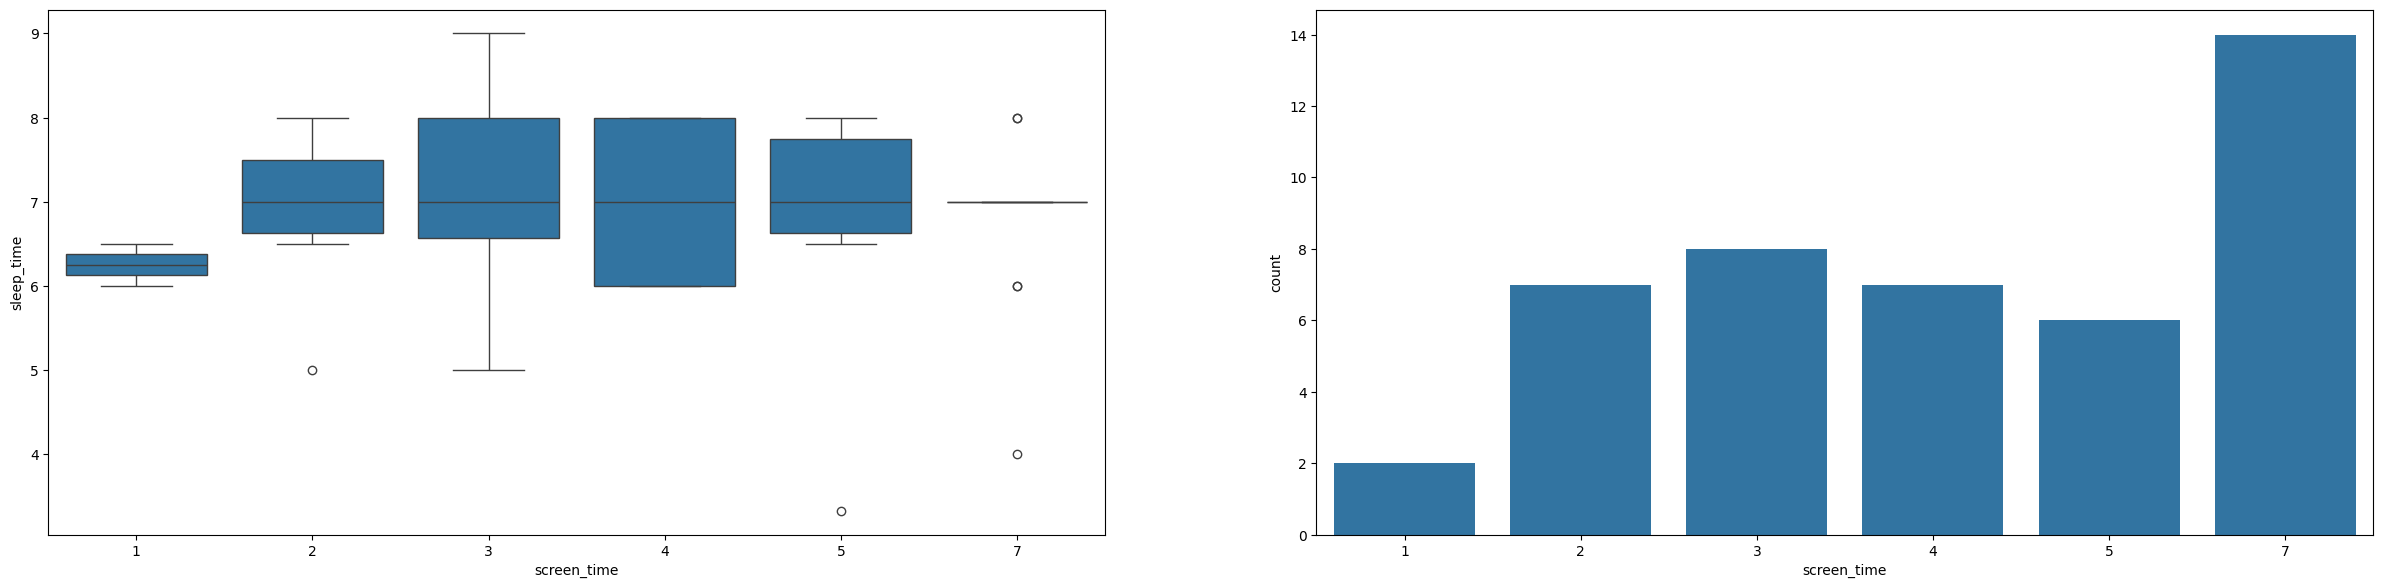

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
sns.boxplot(x='screen_time', y='sleep_time', data=df)

plt.subplot(2,2,2)
sns.countplot(x='screen_time', data=df)

plt.show()

Most people have at least 7 hours of screen time. Sounds logical with all the devices we use daily.

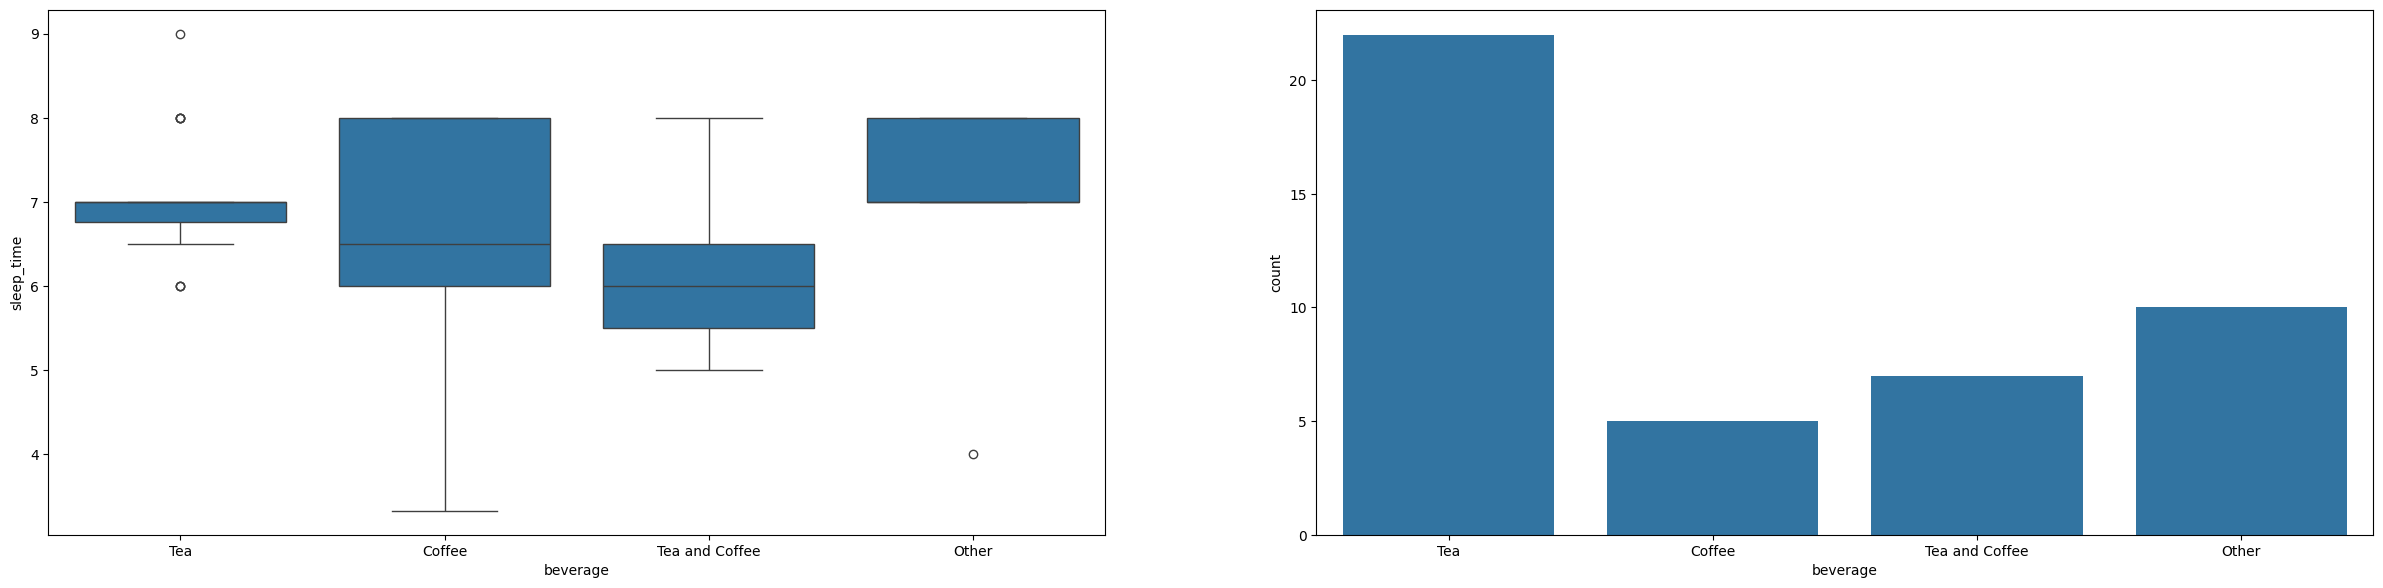

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
sns.boxplot(x='beverage', y='sleep_time', data=df)

plt.subplot(2,2,2)
sns.countplot(x='beverage', data=df)

plt.show()

The most common beverage is Tea. Unfortunately we don't have information if the Tea contains caffeine, which may affect the sleep_time.

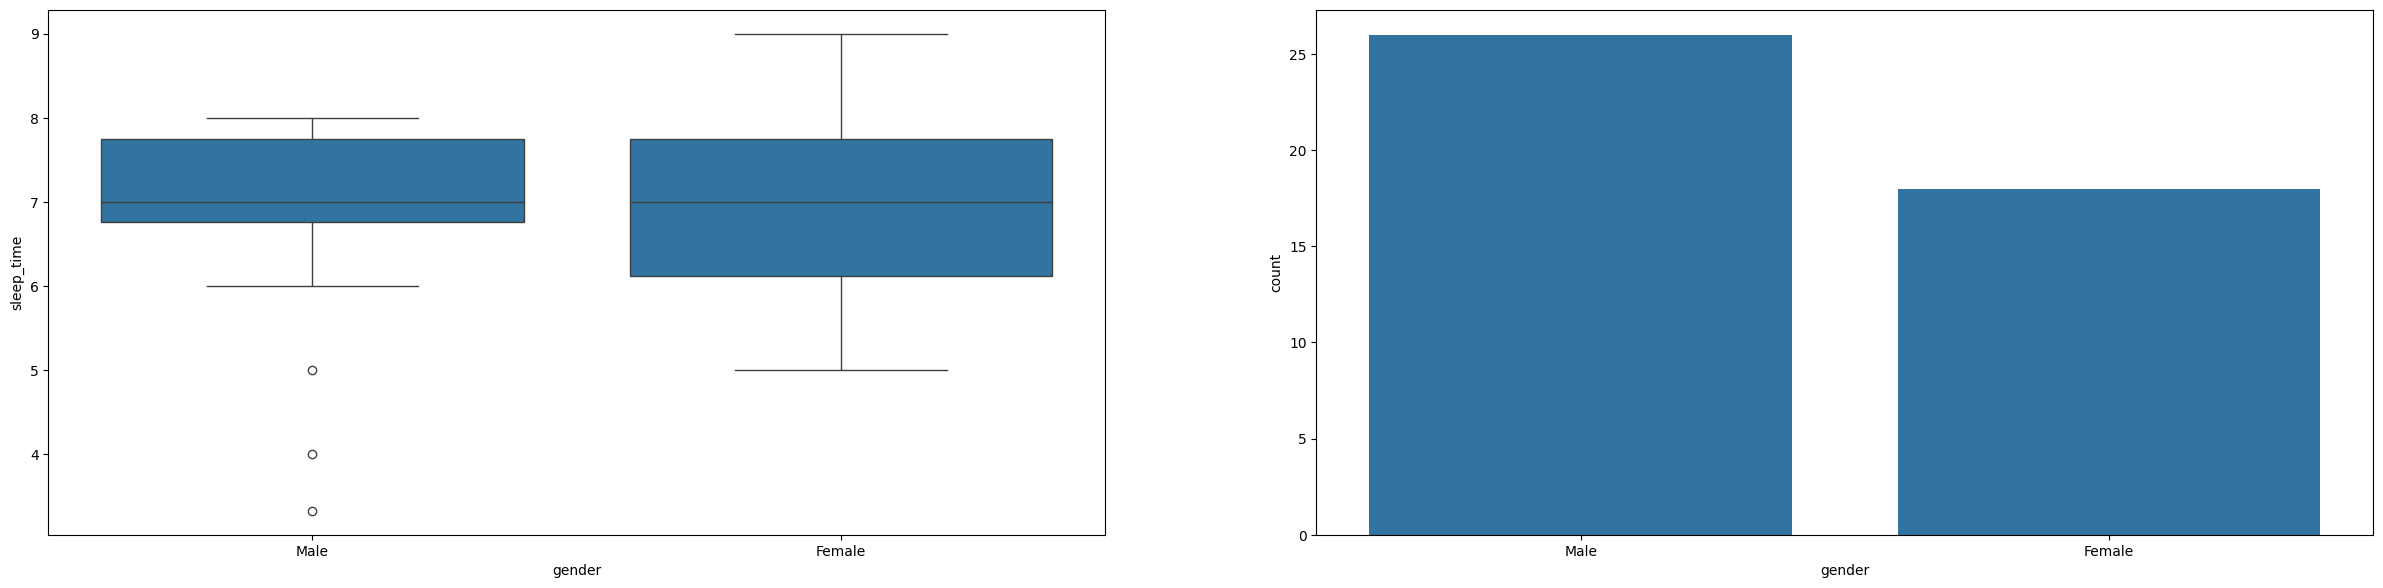

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
sns.boxplot(x='gender', y='sleep_time', data=df)

plt.subplot(2,2,2)
sns.countplot(x='gender', data=df)

plt.show()

The most common gender is Male

In [ ]:
df.gender.value_counts()

Male      26
Female    18
Name: gender, dtype: int64

In [ ]:
# Percentage
(df['gender'].value_counts()/df['gender'].count())*100

Male      59.090909
Female    40.909091
Name: gender, dtype: float64

2.b) Visualizing Numerical Data

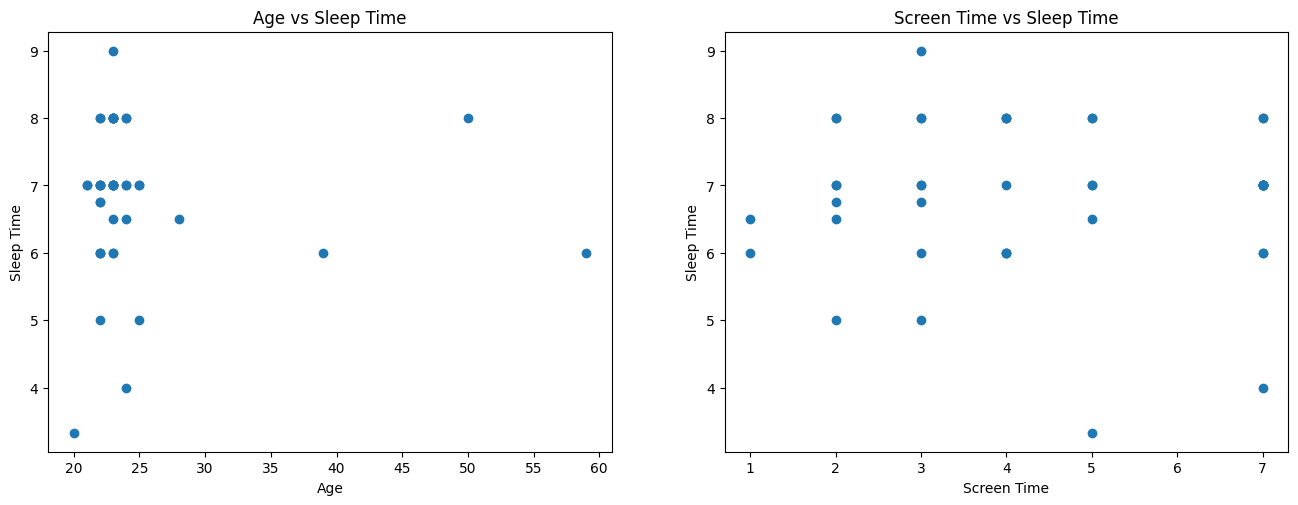

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)

plt.scatter(x='age',y='sleep_time', data=df)
plt.title('Age vs Sleep Time')
plt.ylabel('Sleep Time')
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.scatter(x='screen_time',y='sleep_time', data=df)
plt.title('Screen Time vs Sleep Time')
plt.ylabel('Sleep Time')
plt.xlabel('Screen Time')

plt.show()

In [ ]:
# I don't understand the bluelight_filter value, so i will drop it

df.drop('bluelight_filter', axis=1, inplace=True)
df.head()

,age,gender,meals/day,physical_illness,screen_time,sleep_direction,exercise,smoke/drink,beverage,sleep_time
0,22,Male,two,no,2,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,4,south,no,no,Coffee,8.0000
2,23,Male,three,no,4,south,no,no,Tea,8.0000
3,23,Female,two,no,2,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,7,east,sometimes,yes,Tea and Coffee,6.0000


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,age,gender,meals/day,physical_illness,screen_time,sleep_direction,exercise,smoke/drink,beverage,sleep_time
0,22,Male,two,no,2,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,4,south,no,no,Coffee,8.0000
2,23,Male,three,no,4,south,no,no,Tea,8.0000
3,23,Female,two,no,2,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,7,east,sometimes,yes,Tea and Coffee,6.0000
5,22,Male,two,no,3,west,sometimes,no,Tea,6.7575
6,22,Male,four,no,2,south,yes,no,Other,7.0000
7,24,Female,three,yes,5,east,sometimes,no,Tea,6.5000
8,24,Male,four,no,3,east,yes,no,Other,8.0000
9,23,Female,three,no,7,north,yes,yes,Tea and Coffee,7.0000


After visualising,
we need to preprocess our data into more significant features.
So we can extract the information more effectively with our ML algorithm.

3) Data Preprocessing

We One Hot Encode our categorical data, to transform it into numerical, so our computer can be able to read the values effectively.
pd.get.dummies does precisely that.

In [ ]:
# One Hot Encoding
df = pd.get_dummies(data=df, columns=['gender',
    'meals/day', 'physical_illness', 'sleep_direction', 'exercise', 'smoke/drink',
    'beverage']).copy()

In [ ]:
df.head()

,age,screen_time,sleep_time,gender_Female,gender_Male,meals/day_five,meals/day_four,meals/day_one,meals/day_three,meals/day_two,...,sleep_direction_west,exercise_no,exercise_sometimes,exercise_yes,smoke/drink_no,smoke/drink_yes,beverage_Coffee,beverage_Other,beverage_Tea,beverage_Tea and Coffee
0,22,2,6.7575,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
1,22,4,8.0000,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,23,4,8.0000,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,23,2,6.5000,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,22,7,6.0000,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.shape

(44, 25)

4) Next step,
split the data into training and testing.
It is important to train only the training data and keep the testing data for the final evaluation.

In [ ]:
# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size= 0.7, test_size=0.3,
                                    random_state=100)

After the split,
we need to normalize the remaining numerical data, in order for our training to be more successful, minimizing the predicting errors.

In [ ]:
# MinMaxScaler for numerical values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['age', 'screen_time', 'sleep_time']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

Coorelation Plot, important to understand the coorelation between our
numerical values

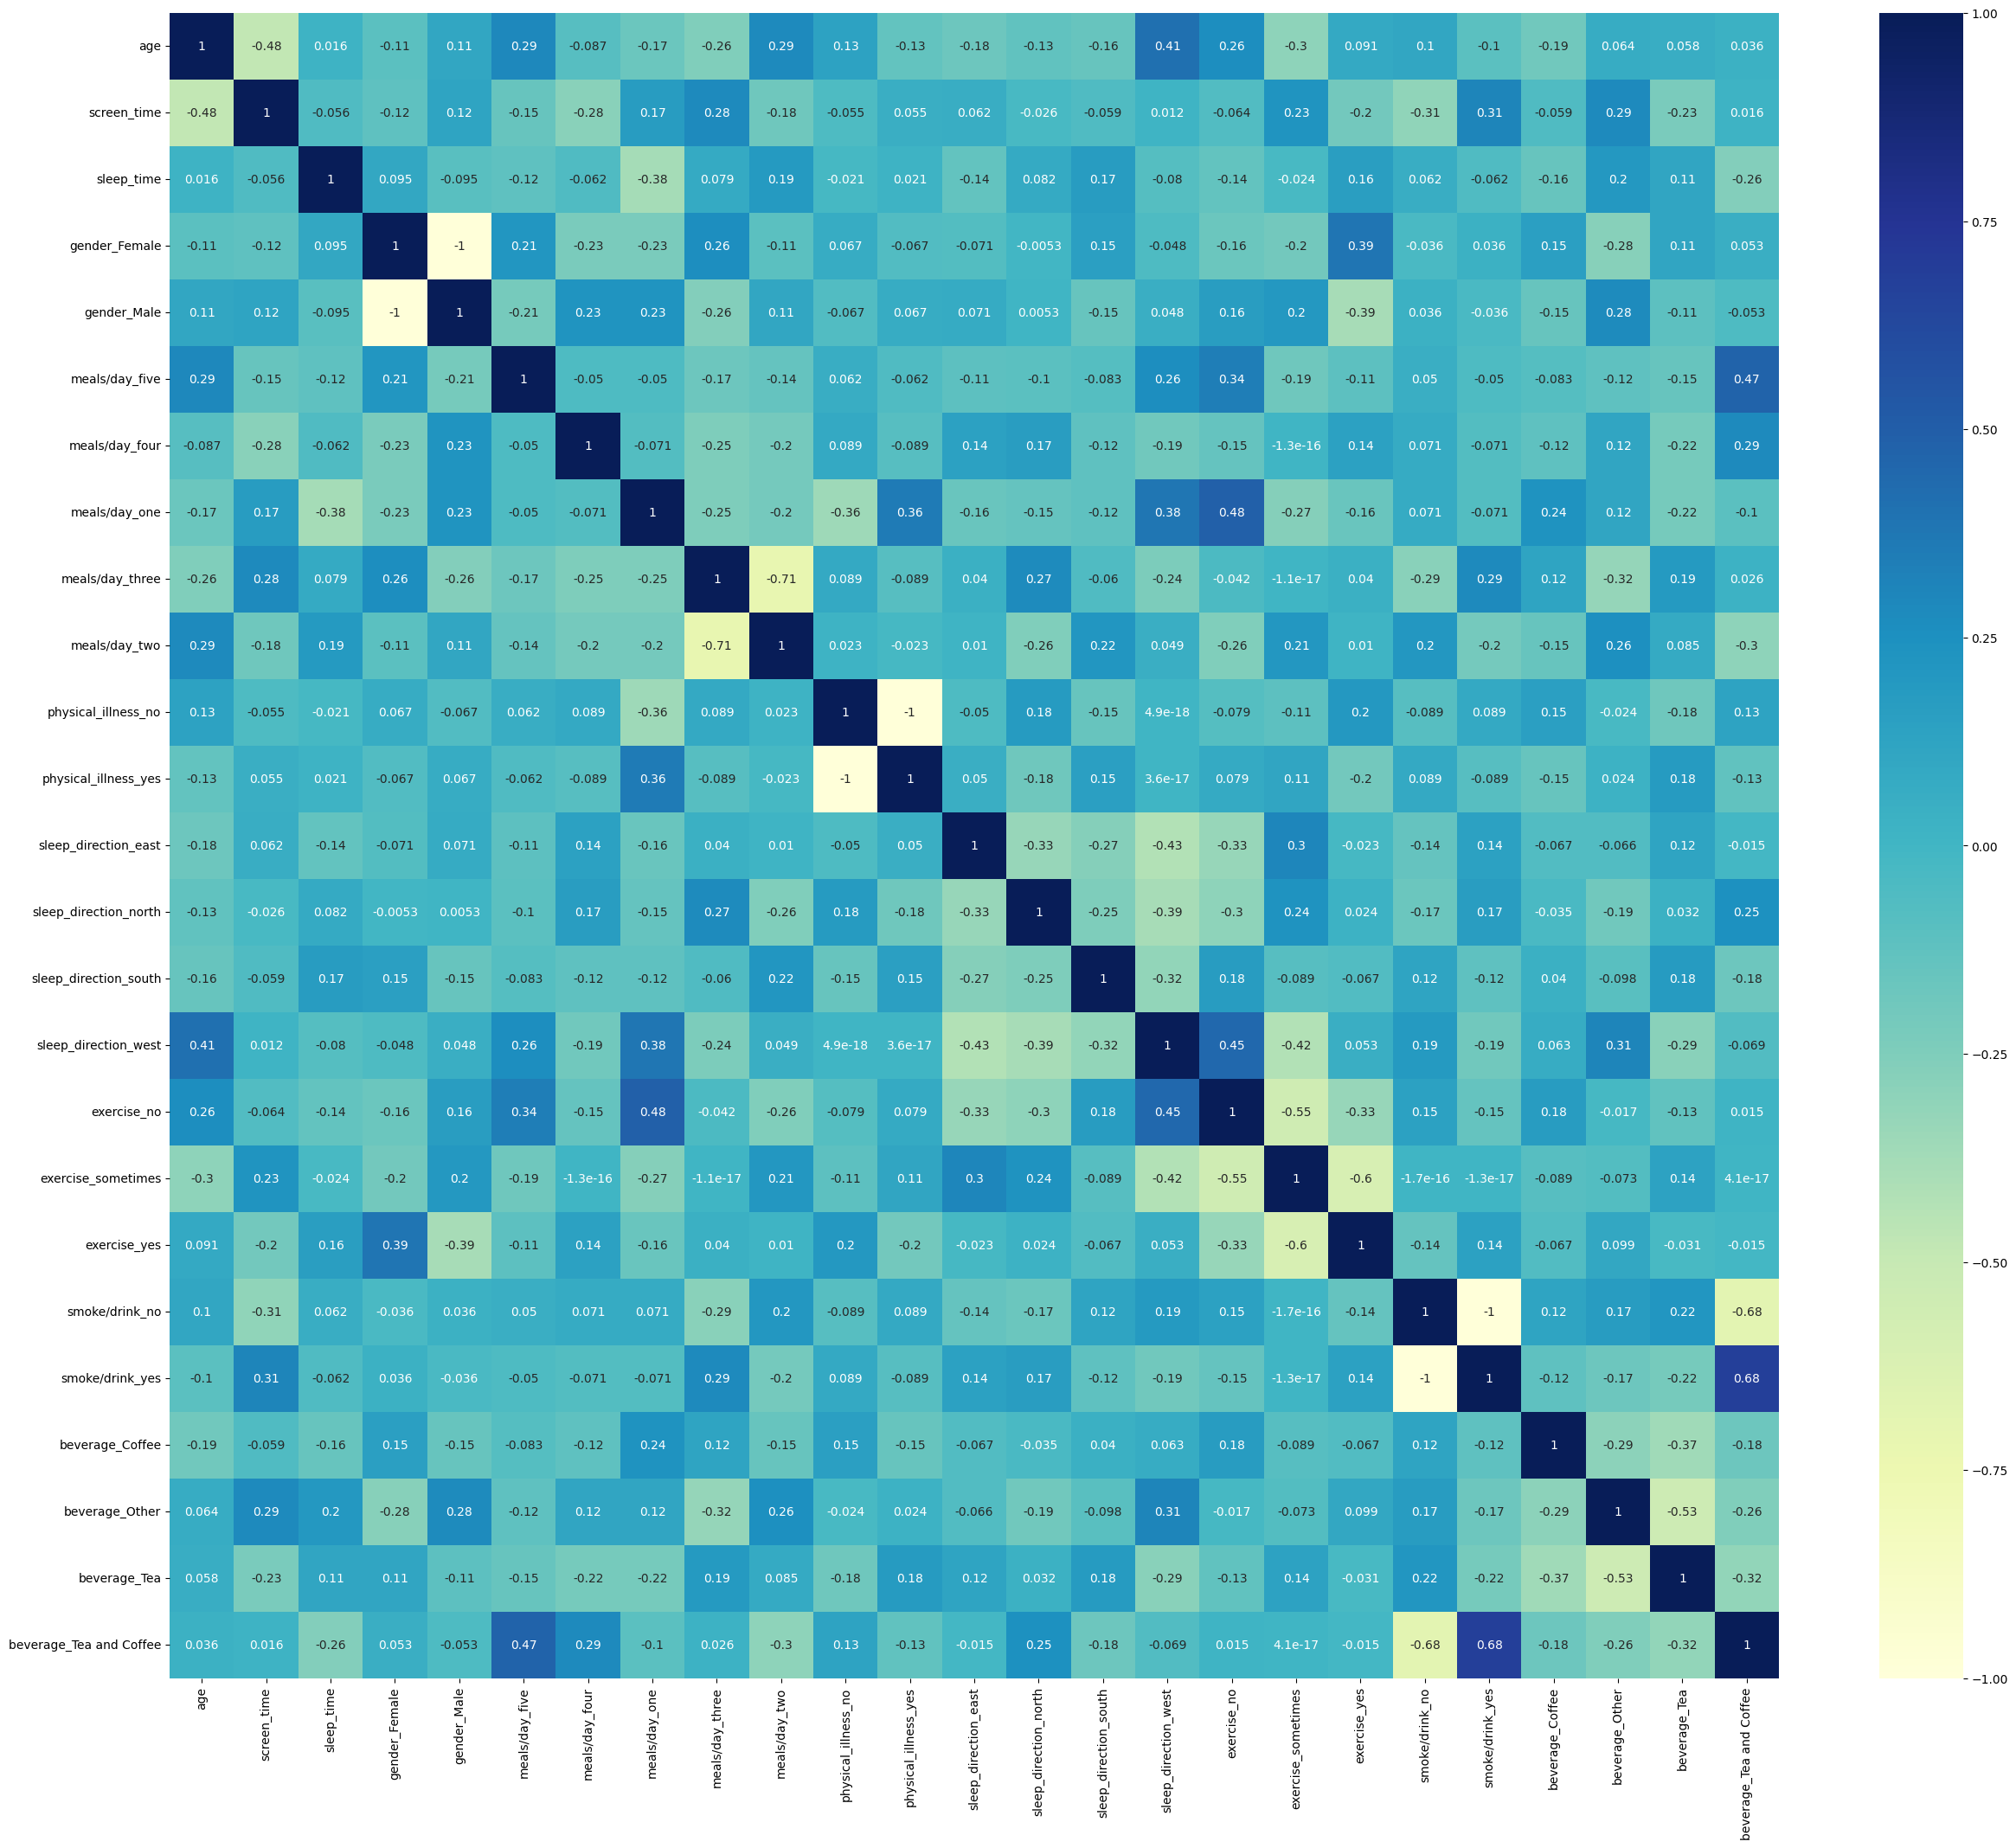

In [ ]:
#Corelation

plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

Seperating our training and testing data into X and y

In [ ]:
# Dividing data into X and y variables
y_train = df_train.pop('sleep_time').copy()
X_train = df_train.copy()

In [ ]:
y_train.head()

20    0.571734
7     0.678801
41    0.785867
18    0.785867
21    0.785867
Name: sleep_time, dtype: float64

In [ ]:
X_train.head()

,age,screen_time,gender_Female,gender_Male,meals/day_five,meals/day_four,meals/day_one,meals/day_three,meals/day_two,physical_illness_no,...,sleep_direction_west,exercise_no,exercise_sometimes,exercise_yes,smoke/drink_no,smoke/drink_yes,beverage_Coffee,beverage_Other,beverage_Tea,beverage_Tea and Coffee
20,0.487179,0.333333,1,0,1,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
7,0.102564,0.666667,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
41,0.025641,1.000000,0,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
18,0.051282,0.333333,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
21,0.076923,0.500000,1,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
y_test = df_test.pop('sleep_time').copy()
X_test = df_test.copy()

In [ ]:
print(y_test.shape)
print(X_test.shape)

(14,)
(14, 24)


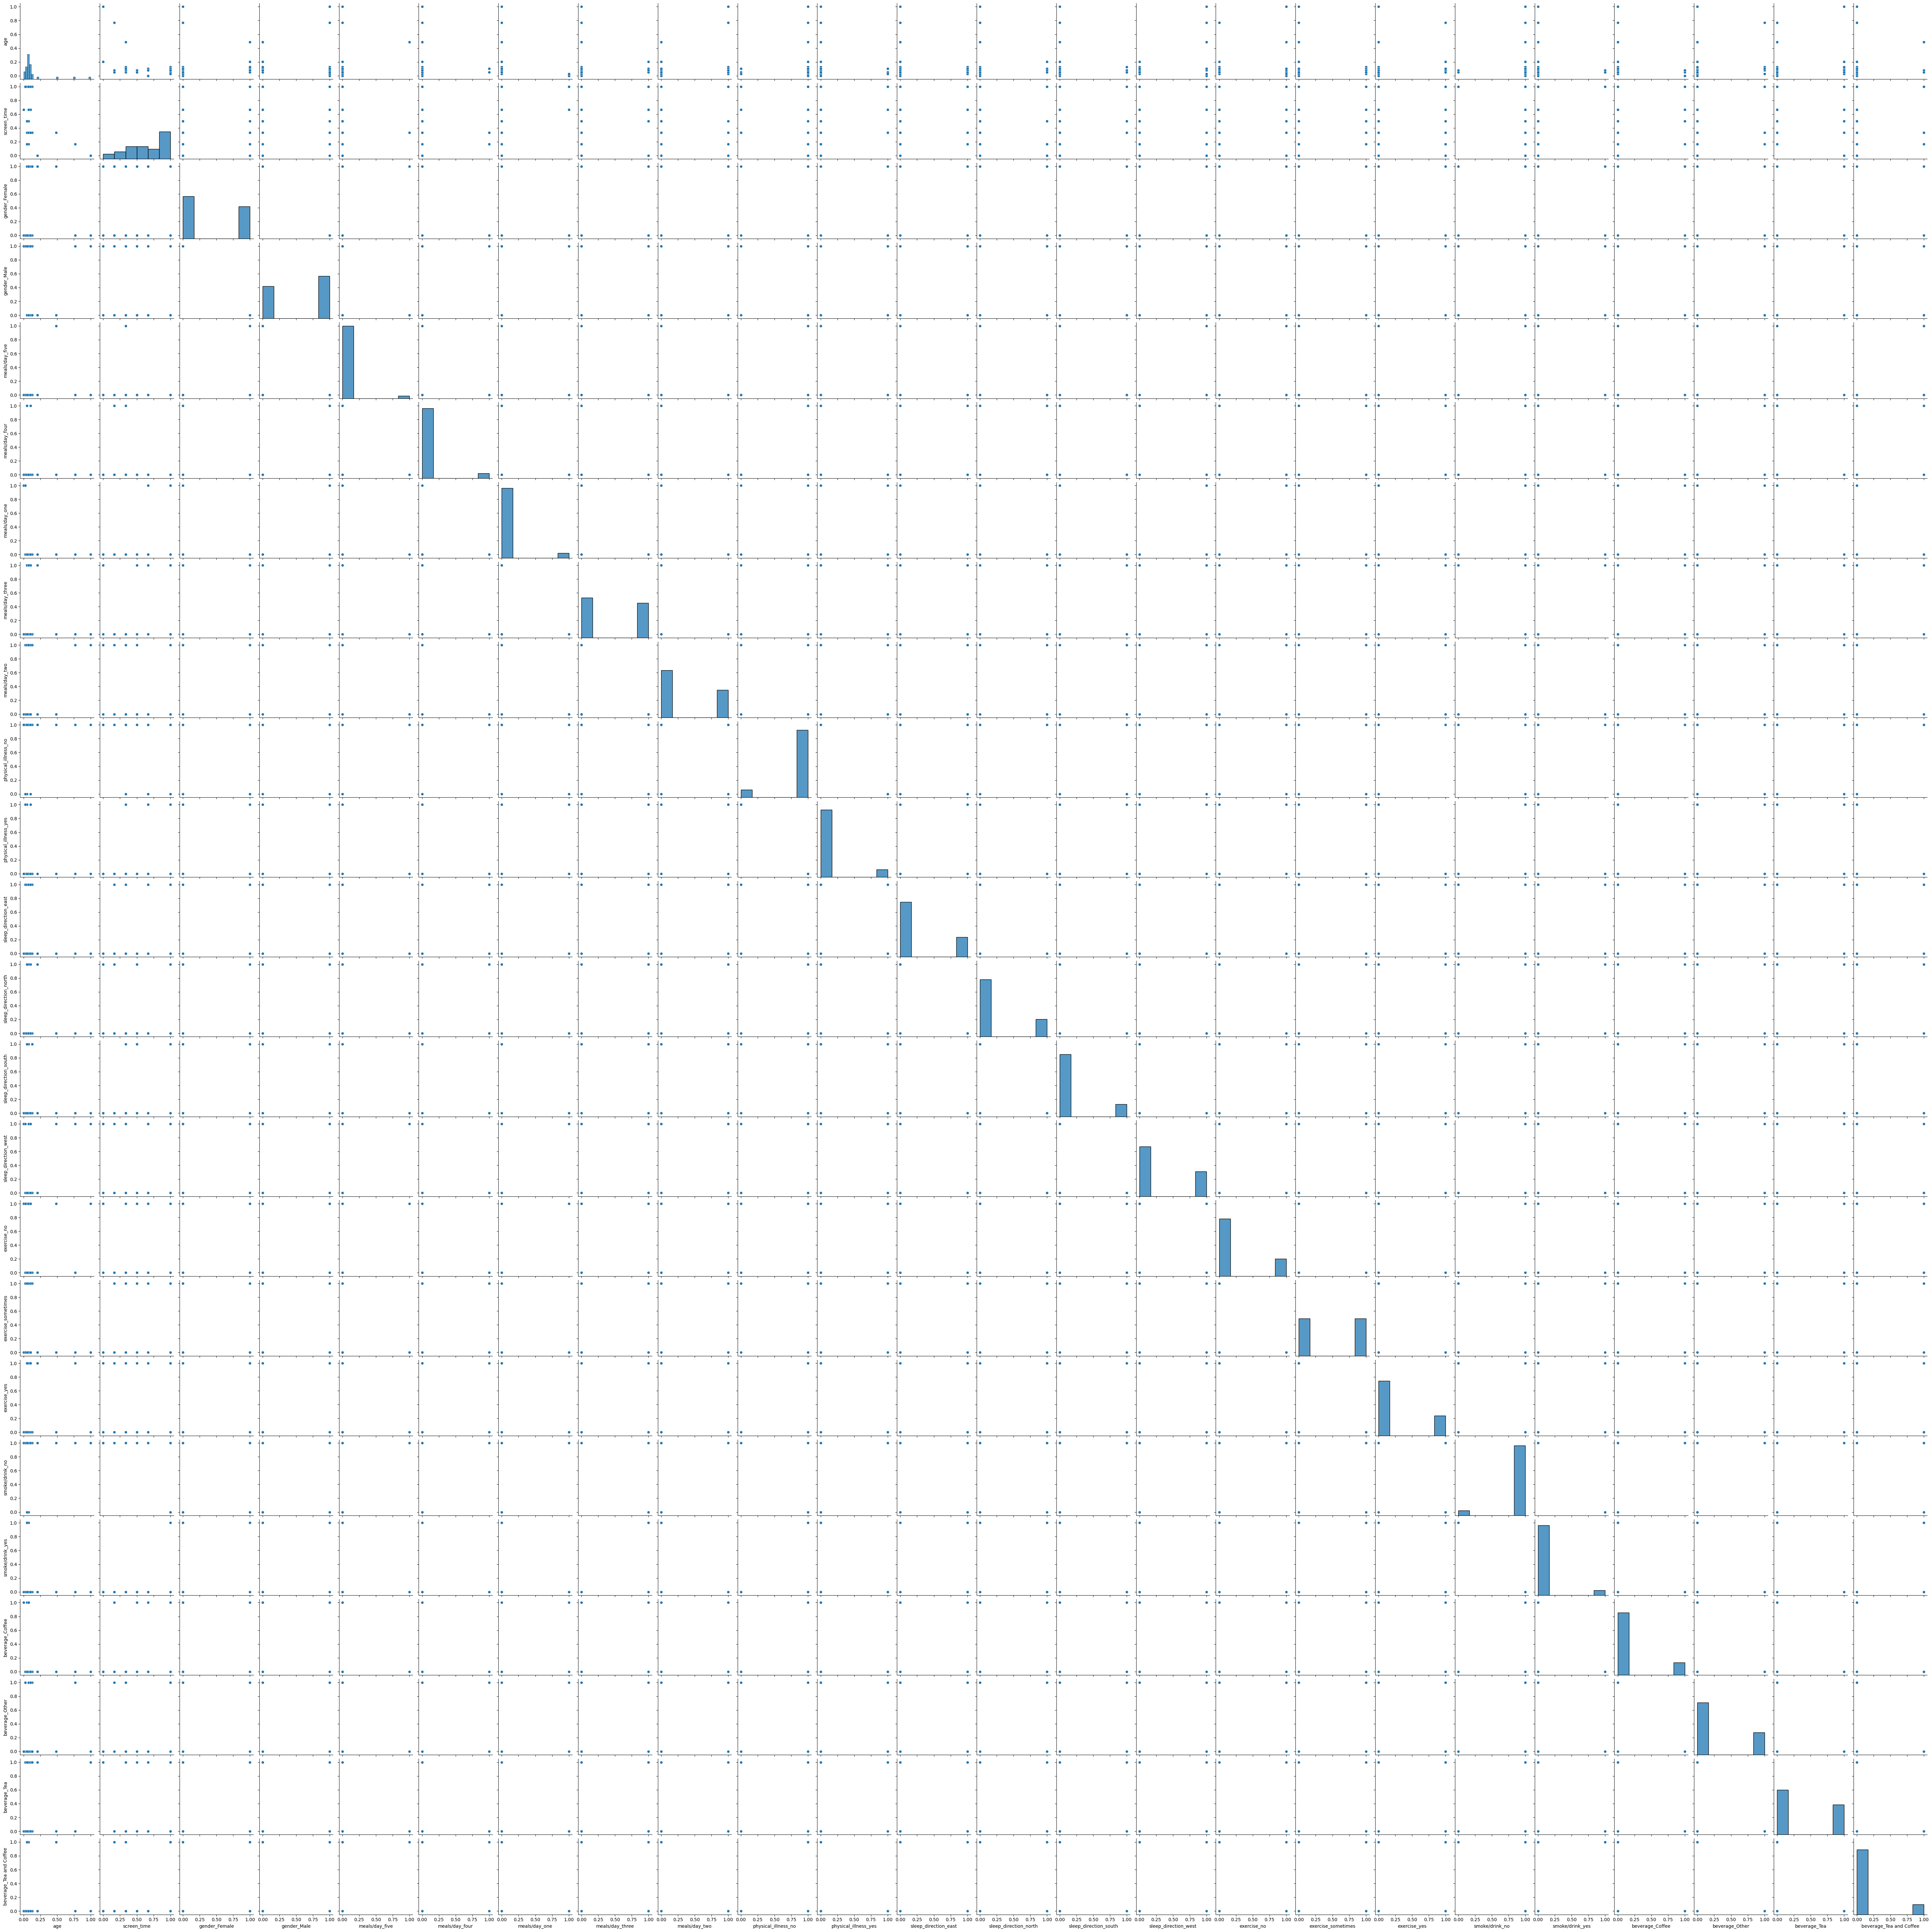

In [ ]:
sns.pairplot(data=X_train)
plt.show()

sns.pairplot plots the pairwise relationships in a dataset. As we can see now, and also earlier. It will be difficult to extract good results from this dataset. There are too little observations to work with.

Final Task,
choosing ideal model for training.

5) Model Building

Model 1
Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
model1 = lr.fit(X_train, y_train)

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
y_pred1

array([ 1.15278144,  1.6321831 ,  0.79057471,  1.01807512,  0.88301336,
        0.42246109,  0.94031576, -0.62092907,  0.81052927,  0.61200789,
        0.96579658, -0.6879321 , -0.38029205,  1.03413457])

In [ ]:
# Residual Analysis

In [ ]:
resid1 = y_test - y_pred1
resid1

6    -0.652781
17   -0.882183
19   -0.290575
29   -0.018075
37   -0.383013
43    0.327539
5    -0.500941
25    0.620929
27   -0.310529
40   -0.362008
0    -0.526422
32    1.437932
31    0.630292
33   -0.534135
Name: sleep_time, dtype: float64

<ipython-input-60-ddffea046d5d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid1, bins=10)


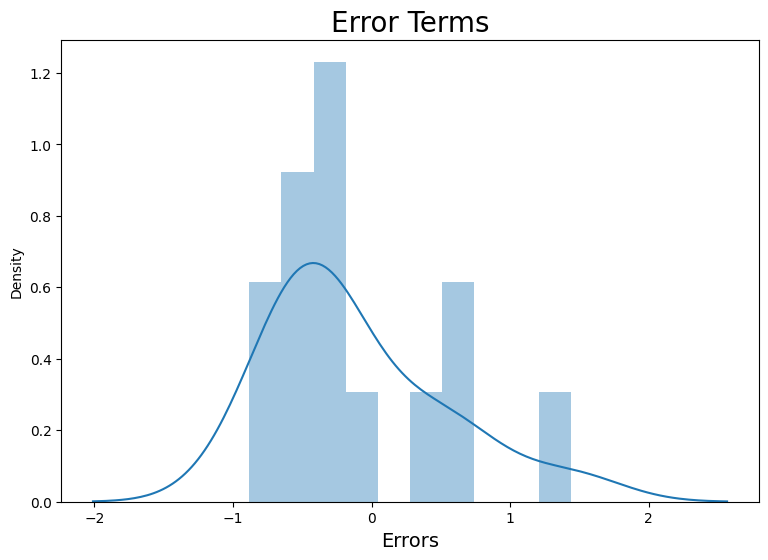

In [ ]:
# Error plot

plt.figure(figsize=(9,6))

sns.distplot(resid1, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

The residuals should follow a normal distribution centered at zero, while the values should vary homogeneously along the values of the independent variable.

Analysis: The error terms are distributed around zero, which means that the prediction of the model is not random.

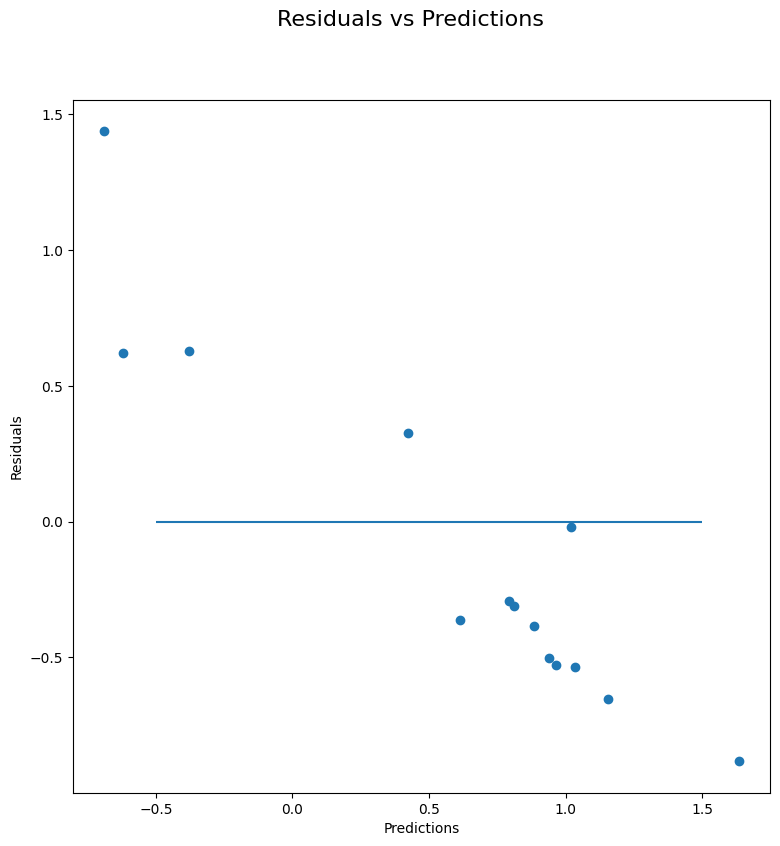

In [ ]:
# Residuals vs Predictions plot

plt.figure(figsize=(9,9))

plt.scatter(y_pred1, resid1)
plt.hlines(0,-0.5, 1.5)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

plt.show()

A well-behaved plot will bounce randomly and form a roughly horizontal band around the residual = 0 line. And, no data points will stand out from the basic random pattern of the other residuals.

Analysis: Some data stands out, so our prediction won't be really good.

In [ ]:
# Evaluation

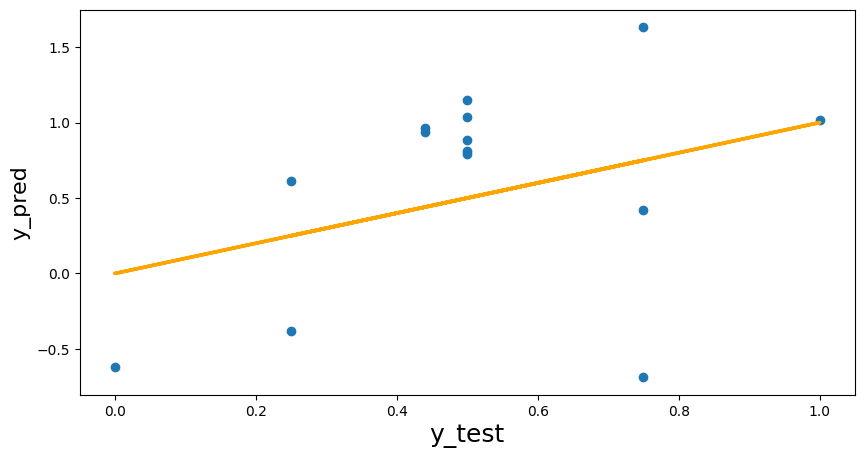

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred1)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

As we can clearly see, the regression line does a terrible job at predicting. It is logical, because we have little observations that are dispersed.
Let's lastly check out the metrics of our prediction.



*   The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. Results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.
A value of R2 between 0 and 1 for no-fit and perfect fit respectively.
R2 will be negative when the  line or curve does an awful job of fitting the data. This can happen when you fit a poorly chosen model.

*   The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.
The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). A value of 0 indicates no error or perfect predictions.  Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.

*   The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:",r2_score(y_test, y_pred1))
print('MAE:', mean_absolute_error(y_test, y_pred1))
print('MSE:', mean_squared_error(y_test, y_pred1))

R2 Score: -5.638135645656818
MAE: 0.5340967090013191
MSE: 0.3881729197014251


Recursive Feature Elimination Implementation
is a feature selection algorithm.

A machine learning dataset for classification or regression is comprised of rows and columns. Rows are often referred to as samples and columns are referred to as features.

Feature selection refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

Extract important variables

The RFE() method returns a "support" array of variables considered important:

If support == True: Important variable

If support == False: Not important variable

In [ ]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z], '\t\t\t', rfe.support_[z])

age 			 True
screen_time 			 True
gender_Female 			 False
gender_Male 			 False
meals/day_five 			 True
meals/day_four 			 True
meals/day_one 			 True
meals/day_three 			 False
meals/day_two 			 False
physical_illness_no 			 True
physical_illness_yes 			 False
sleep_direction_east 			 False
sleep_direction_north 			 True
sleep_direction_south 			 False
sleep_direction_west 			 True
exercise_no 			 True
exercise_sometimes 			 False
exercise_yes 			 False
smoke/drink_no 			 True
smoke/drink_yes 			 True
beverage_Coffee 			 False
beverage_Other 			 False
beverage_Tea 			 False
beverage_Tea and Coffee 			 True


In [ ]:
col = X_train.columns[rfe.support_]
for x in col:
    print(x)

age
screen_time
meals/day_five
meals/day_four
meals/day_one
physical_illness_no
sleep_direction_north
sleep_direction_west
exercise_no
smoke/drink_no
smoke/drink_yes
beverage_Tea and Coffee


In [ ]:
# Dataset after rfe
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,age,screen_time,meals/day_five,meals/day_four,meals/day_one,physical_illness_no,sleep_direction_north,sleep_direction_west,exercise_no,smoke/drink_no,smoke/drink_yes,beverage_Tea and Coffee
20,0.487179,0.333333,1,0,0,1,0,1,1,1,0,1
7,0.102564,0.666667,0,0,0,0,0,0,0,1,0,0
41,0.025641,1.000000,0,0,0,1,0,0,0,1,0,0
18,0.051282,0.333333,0,0,0,0,0,0,0,1,0,0
21,0.076923,0.500000,0,0,0,1,1,0,0,1,0,0


In [ ]:
final_features = list(X_train_rfe.columns)

X_test_new = X_test.filter(final_features)

X_test_new.head()

,age,screen_time,meals/day_five,meals/day_four,meals/day_one,physical_illness_no,sleep_direction_north,sleep_direction_west,exercise_no,smoke/drink_no,smoke/drink_yes,beverage_Tea and Coffee
6,0.000000,0.0,0,1,0,1,0,0,0,1,0,0
17,0.333333,0.0,0,0,0,1,0,1,0,0,1,0
19,0.333333,1.0,0,0,0,1,0,1,1,1,0,0
29,0.333333,0.2,0,0,0,1,0,1,1,1,0,0
37,0.000000,0.6,0,0,0,1,0,0,1,1,0,0


In [ ]:
model2 = lr.fit(X_train_rfe, y_train)

In [ ]:
y_pred2 = model2.predict(X_test_new)

In [ ]:
resid2 = y_test - y_pred2
resid2

6    -0.559681
17   -0.895497
19   -0.376024
29    0.050441
37   -0.327490
43    0.196402
5    -0.461828
25    0.432049
27   -0.376024
40   -0.453133
0    -0.480212
32    1.433100
31    0.511663
33   -0.438074
Name: sleep_time, dtype: float64

<ipython-input-74-f37422a72c72>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid2, bins=10)


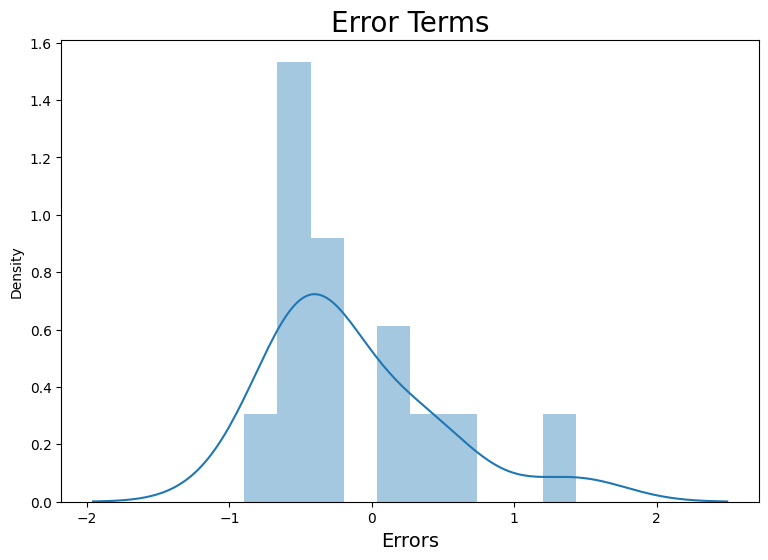

In [ ]:
plt.figure(figsize=(9,6))

sns.distplot(resid2, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

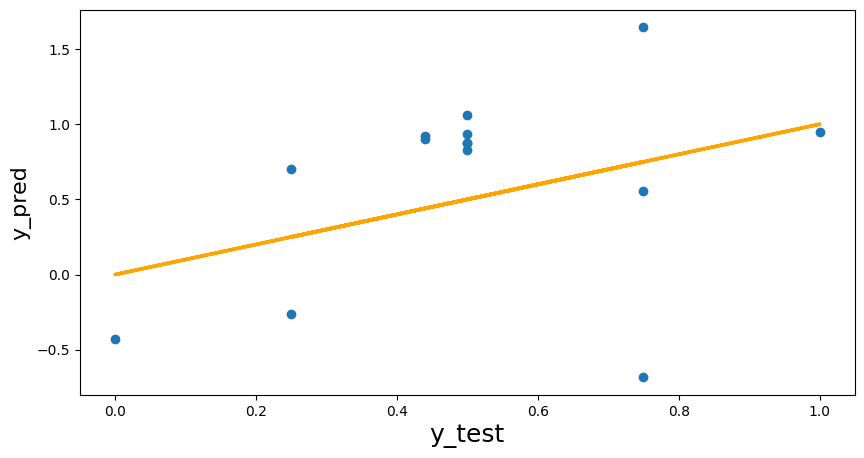

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred2)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [ ]:
print("R2 Score:",r2_score(y_test, y_pred2))
print('MAE:', mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))

R2 Score: -4.9727353323971775
MAE: 0.49940124649717704
MSE: 0.34926284070398383


The Linear Regression model with the RFE filter did much better than the first model. But there is still much room to imporve. It will be difficult, since we said the dataset is small. But we should try some more diverse algorithms.

In [ ]:
# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

We will use GridSearch to search for the ideal hyperparameters.

In [ ]:
parameters={"kernel":["linear","poly", "rbf", "sigmoid"],
            "C" : [1,3,5,7,9,11,12],
           "epsilon":[0.01,0.1,0.3,0.5,0.7,1,1.5,2] }

In [ ]:
tuning_model = SVR()

In [ ]:
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 3, 5, 7, 9, 11, 12],
                         'epsilon': [0.01, 0.1, 0.3, 0.5, 0.7, 1, 1.5, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# best hyperparameters
grids.best_estimator_

SVR(C=1, epsilon=0.3, kernel='sigmoid')

In [ ]:
# best model score
grids.best_score_

-1.1127124078588155

Training Support Vector Regression,
with the best hyperparameters

In [ ]:
model3 = SVR(C=1, epsilon=0.3, kernel='sigmoid')
model3.fit(X_train, y_train)

SVR(C=1, epsilon=0.3, kernel='sigmoid')

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
resid3 = y_test - y_pred3

<ipython-input-87-1ea8ebd0addb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid3, bins=10)


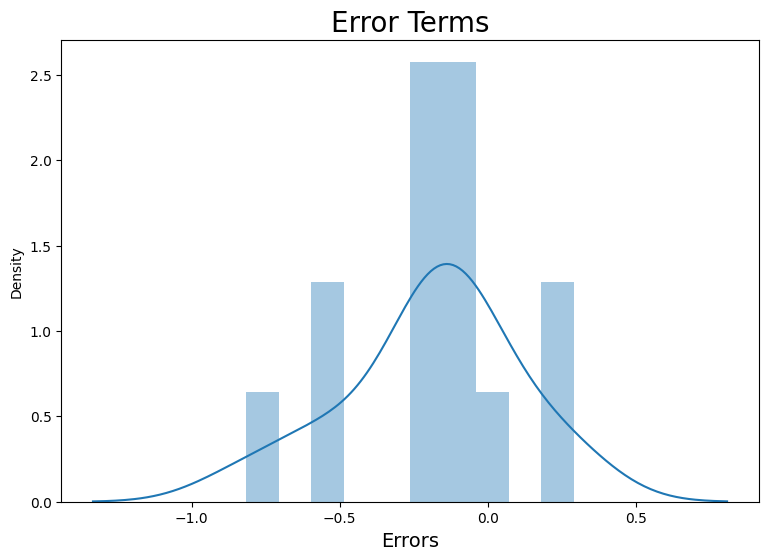

In [ ]:
plt.figure(figsize=(9,6))

sns.distplot(resid3, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

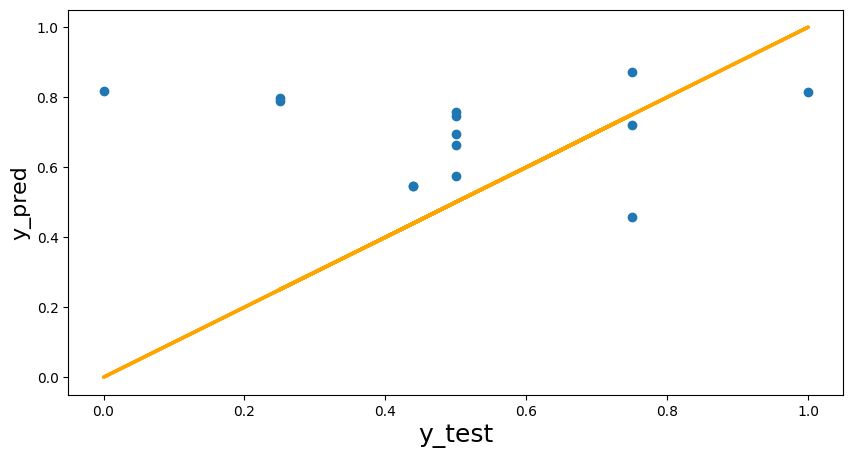

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred3)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [ ]:
print("R2 Score:",r2_score(y_test, y_pred3))
print('MAE:', mean_absolute_error(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))

R2 Score: -0.974219006973527
MAE: 0.263439024051081
MSE: 0.11544481718573496


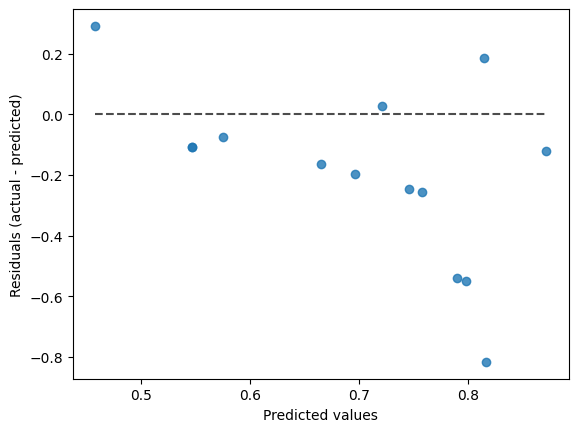

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true=y_test , y_pred=y_pred3)

display.plot()
plt.show()

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Likewise, I will use GridSearch

In [ ]:
parameters={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
           "max_depth":[1,2,3,4,5,7,9,10,12,15,20],
            "min_samples_split":[1,2,3,4,5,7,9,10] }

In [ ]:
tuning_model = DecisionTreeRegressor()
grids = GridSearchCV(tuning_model, parameters, cv=5)

grids.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 1760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9, 10, 12, 15, 20],
                         'min_samples_split': [1, 2, 3, 4, 5, 7, 9, 10]})

In [ ]:
# best hyperparameters
print(grids.best_estimator_)
# best model score
print(grids.best_score_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1)
-0.20641765501370024


In [ ]:
model4 = DecisionTreeRegressor(criterion='absolute_error', max_depth=1, min_samples_split=4)

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

<ipython-input-97-3fa89120ab3e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid4, bins=10)


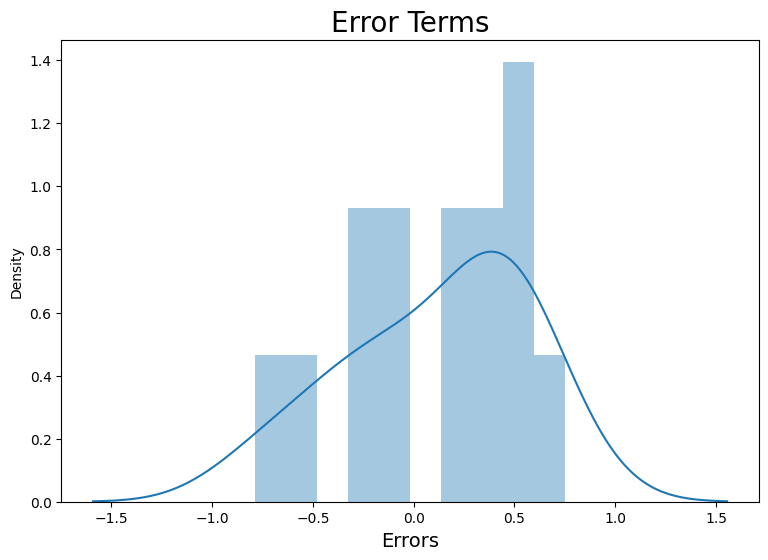

In [ ]:
resid4 = y_test - y_pred4

plt.figure(figsize=(9,6))

sns.distplot(resid4, bins=10)
plt.title('Error Terms', fontsize= 20)
plt.xlabel('Errors', fontsize= 14)

plt.show()

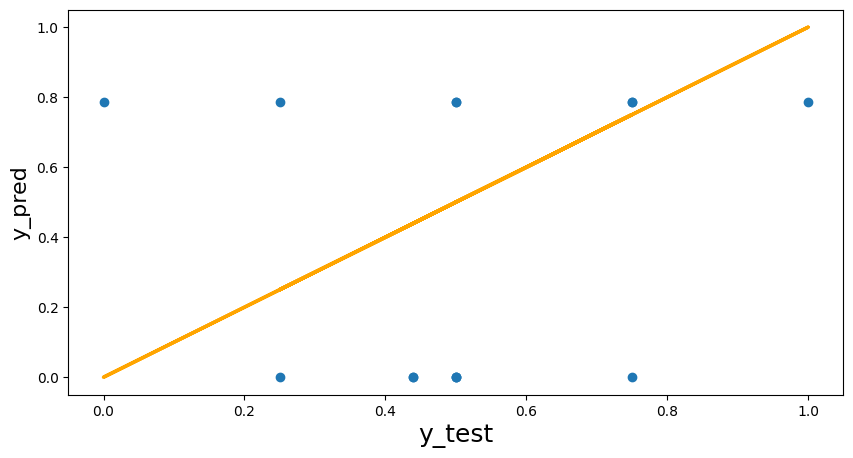

In [ ]:
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred4)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

f = lambda x: x

x = np.array(y_test)

plt.plot(x, f(x), lw=2.5, c="orange")

In [ ]:
print("R2 Score:",r2_score(y_test, y_pred4))
print('MAE:', mean_absolute_error(y_test, y_pred4))
print('MSE:', mean_squared_error(y_test, y_pred4))

R2 Score: -2.5151149559601733
MAE: 0.3970061563169165
MSE: 0.20555055039195383


So comparing all models together. The model3, with the SVR, has the best results. With the GridSearch method we were able to find the best hyperparameters to tune our model. There isn't much else we can do, since we have limited data samples.